In [131]:
# Initial imports
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score 

data = ('/content/model_df.csv')
model_df = pd.read_csv(data)

In [9]:
# change zip code to string and reformat
model_df['ZIP_CODE'] = model_df['ZIP_CODE'].apply(lambda x: '0' + str(x) if x < 10000 else str(x))

# merge duplicate zip code rows
#model_df = model_df.groupby(['ZIP_CODE'], as_index=False)['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST',
#                     'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non-Networked',	'NETWORK_TYPE_Other-Network',
#                     'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME',
#                     'REG_COUNTS'].sum()

# set ZIP_CODE as index
model_df = model_df.set_index('ZIP_CODE')

model_df.head()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,
03266,0,2,0,0,1,0,851.0,54904.0,0
07001,0,1,0,0,1,0,5022.0,69849.0,173
07003,0,12,5,4,1,3,18577.0,78034.0,795
07004,0,6,3,0,1,2,2621.0,122063.0,307
07005,0,1,10,0,1,1,5489.0,111946.0,445


In [10]:
model_df['EV_TOTAL'] = model_df.iloc[:, -9:-7].sum(axis=1)
model_df = model_df[['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST', 'EV_TOTAL',
                     'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non-Networked',	'NETWORK_TYPE_Other-Network',
                     'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME',
                     'REG_COUNTS']]
model_df

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,,
03266,0,2,0,2,0,1,0,851.0,54904.0,0
07001,0,1,0,1,0,1,0,5022.0,69849.0,173
07003,0,12,5,12,4,1,3,18577.0,78034.0,795
07004,0,6,3,6,0,1,2,2621.0,122063.0,307
07005,0,1,10,1,0,1,1,5489.0,111946.0,445
...,...,...,...,...,...,...,...,...,...,...
99352,0,13,3,13,1,1,4,12877.0,81410.0,3413
99354,36,48,0,84,0,45,1,9175.0,73369.0,2082
99361,0,1,0,1,0,0,1,750.0,69118.0,100


In [11]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 03266 to 99403
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EV_LEVEL_1                  2493 non-null   int64  
 1   EV_LEVEL_2                  2493 non-null   int64  
 2   EV_FAST                     2493 non-null   int64  
 3   EV_TOTAL                    2493 non-null   int64  
 4   NETWORK_TYPE_ChargePoint    2493 non-null   int64  
 5   NETWORK_TYPE_Non-Networked  2493 non-null   int64  
 6   NETWORK_TYPE_Other-Network  2493 non-null   int64  
 7   TOTAL_HOUSEHOLDS            2493 non-null   float64
 8   MEDIAN_INCOME               2493 non-null   float64
 9   REG_COUNTS                  2493 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 214.2+ KB


In [12]:
model_df.describe()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
count,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000
mean,0.279182,8.221019,1.715604,8.500201,2.022062,0.697152,1.468111,8606.855195,73166.091456,666.987164
std,2.064343,14.277310,3.838397,14.614100,4.819944,1.474278,2.382783,6846.422036,30414.784624,1814.401805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,10804.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3047.000000,52492.000000,2.000000
50%,0.000000,4.000000,0.000000,4.000000,1.000000,0.000000,1.000000,7538.000000,65906.000000,89.000000
75%,0.000000,9.000000,1.000000,9.000000,2.000000,1.000000,2.000000,12502.000000,87311.000000,496.000000
max,48.000000,227.000000,38.000000,227.000000,85.000000,45.000000,29.000000,41355.000000,240507.000000,29672.000000


<function matplotlib.pyplot.show>

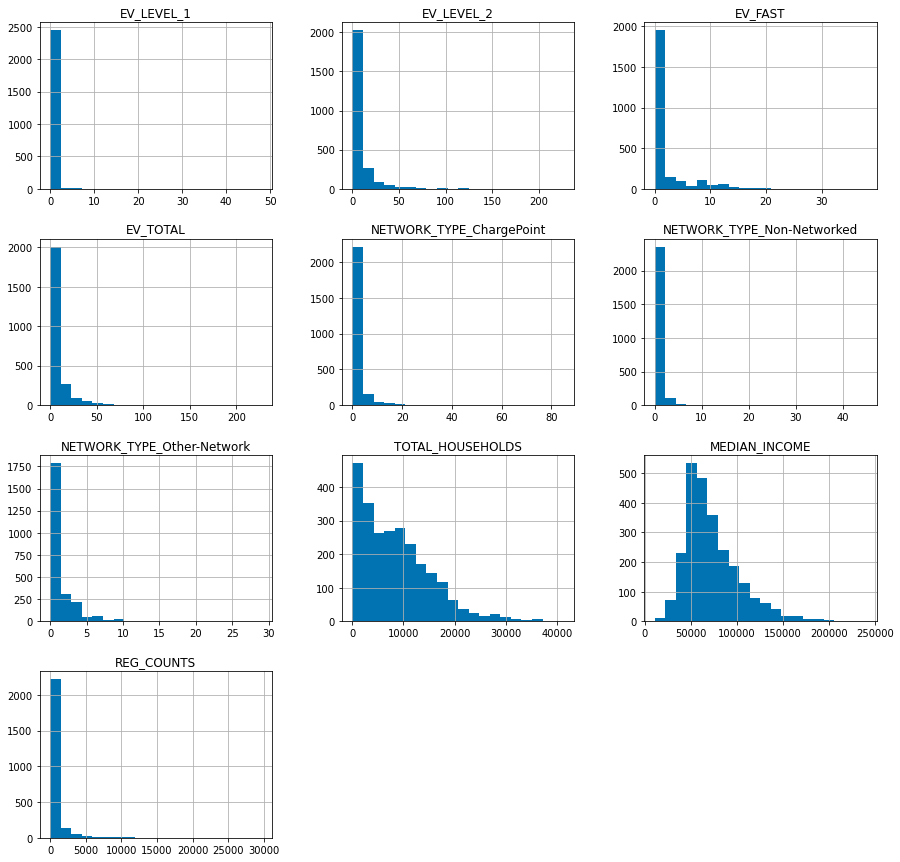

In [13]:
model_df.hist(bins=20, figsize=(15,15))
plt.show

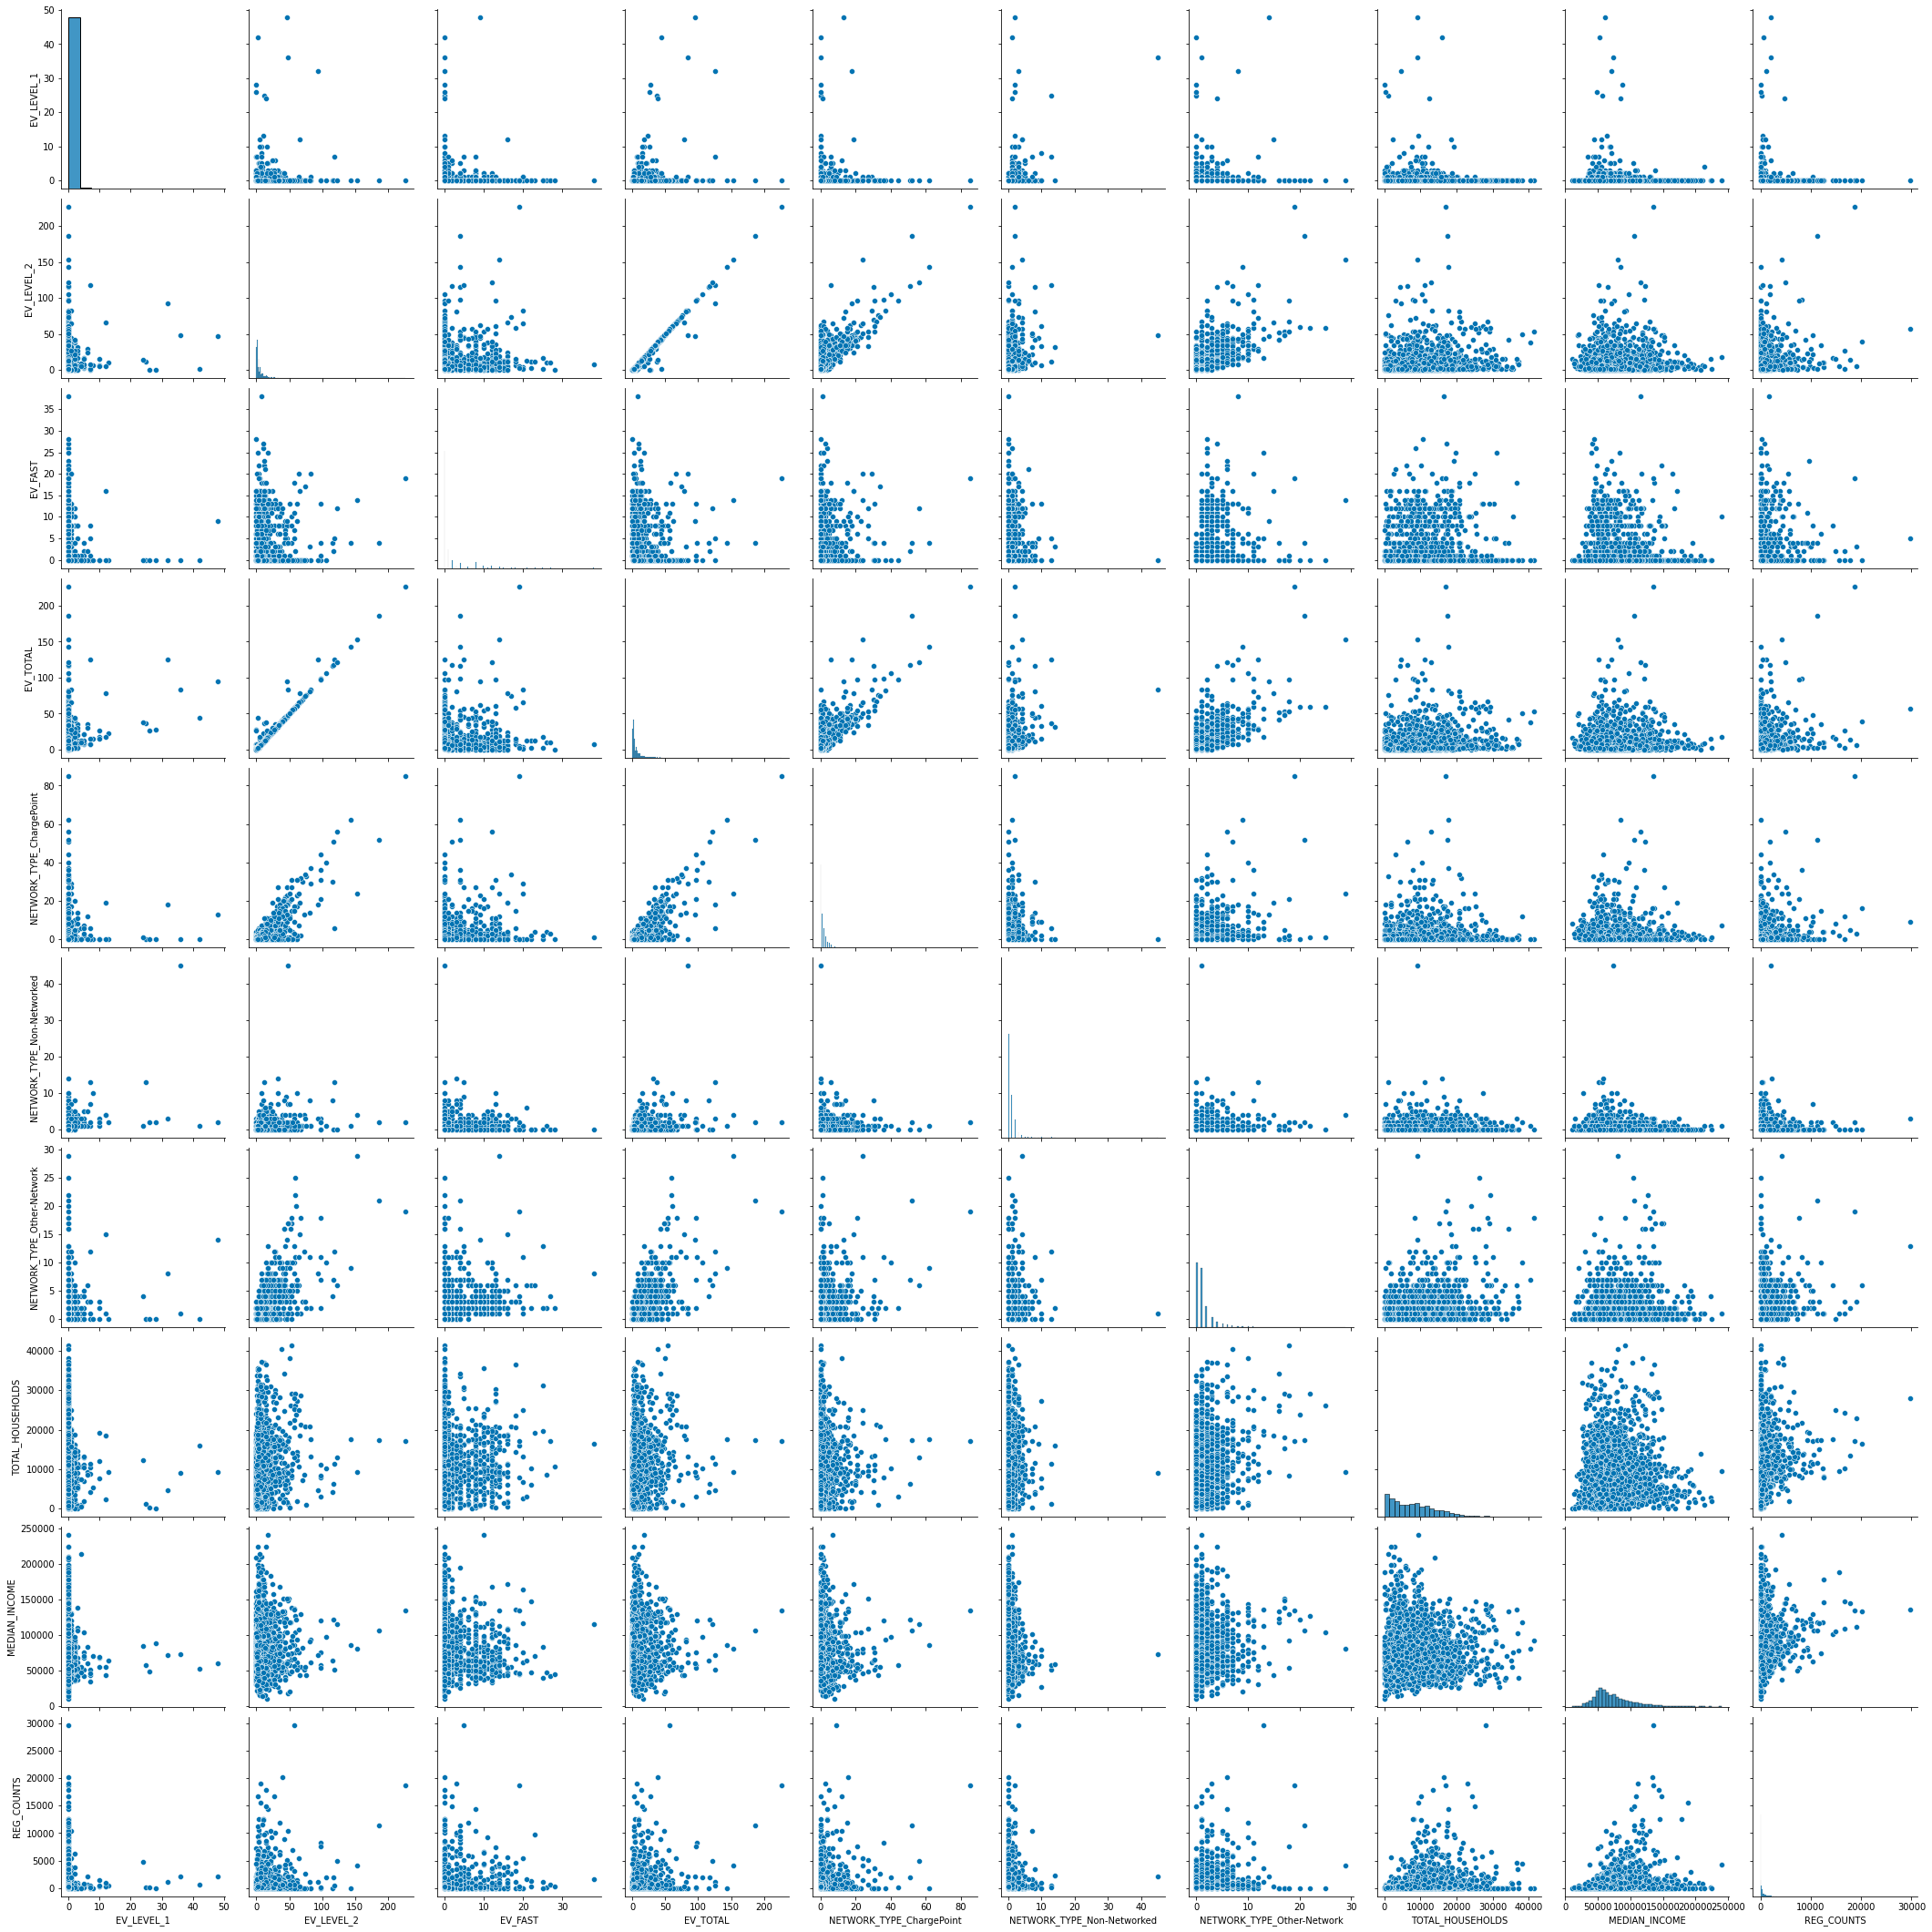

In [14]:
sns.set_palette('colorblind')
sns.pairplot(data=model_df, height=3)

In [15]:
corr_matrix = model_df.corr()
corr_matrix['REG_COUNTS'].sort_values(ascending=False)

REG_COUNTS                    1.000000
NETWORK_TYPE_Other-Network    0.275864
TOTAL_HOUSEHOLDS              0.275418
MEDIAN_INCOME                 0.275283
EV_LEVEL_2                    0.271770
EV_TOTAL                      0.266710
NETWORK_TYPE_ChargePoint      0.248188
EV_FAST                       0.122623
NETWORK_TYPE_Non-Networked    0.040663
EV_LEVEL_1                    0.008519
Name: REG_COUNTS, dtype: float64

# Scaling & Normalization

In [99]:
scaler = StandardScaler()

In [100]:
scaled_data = scaler.fit_transform(model_df)

In [101]:
scaled_df = pd.DataFrame(scaled_data, index=model_df.index, columns=model_df.columns)
scaled_df.head()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,,
03266,-0.135267,-0.435815,-0.447048,-0.444879,-0.419604,0.205462,-0.616256,-1.133061,-0.600555,-0.367681
07001,-0.135267,-0.505870,-0.447048,-0.513320,-0.419604,0.205462,-0.616256,-0.523715,-0.109084,-0.272314
07003,-0.135267,0.264737,0.855840,0.239529,0.410448,0.205462,0.643028,1.456548,0.160083,0.070568
07004,-0.135267,-0.155594,0.334685,-0.171116,-0.419604,0.205462,0.223267,-0.874480,1.607992,-0.198445
07005,-0.135267,-0.505870,2.158729,-0.513320,-0.419604,0.205462,-0.196495,-0.455491,1.275291,-0.122372


In [102]:
y = scaled_df.REG_COUNTS
y.shape

(2493,)

In [103]:
X = scaled_df.drop(['REG_COUNTS'], axis=1)
X.shape

(2493, 9)

In [104]:
corr_matrix = scaled_df.corr()
corr_matrix['REG_COUNTS'].sort_values(ascending=False)

REG_COUNTS                    1.000000
NETWORK_TYPE_Other-Network    0.275864
TOTAL_HOUSEHOLDS              0.275418
MEDIAN_INCOME                 0.275283
EV_LEVEL_2                    0.271770
EV_TOTAL                      0.266710
NETWORK_TYPE_ChargePoint      0.248188
EV_FAST                       0.122623
NETWORK_TYPE_Non-Networked    0.040663
EV_LEVEL_1                    0.008519
Name: REG_COUNTS, dtype: float64

# Linear Regression

In [105]:
X_scaled = scaled_df.EV_TOTAL.values.reshape(-1,1)

In [106]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [107]:
# Train the model using the training sets
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [108]:
# Make predictions using the testing set
y_pred = lin_model.predict(X_test)
print(y_pred.shape)

(823,)


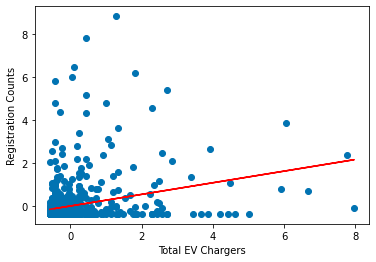

In [139]:
plt.scatter(X_test, y_test)
plt.xlabel('Total EV Chargers')
plt.ylabel('Registration Counts')
plt.plot(X_test, y_pred, color='red')
plt.show()

In [110]:
# The coefficients
print("Coefficients: \n", lin_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.27016916]
Mean squared error: 0.83
Coefficient of determination: 0.07


# Multivariable Linear Regression

In [111]:
multi_X = model_df[['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST', 'EV_TOTAL',
                    'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non-Networked',	'NETWORK_TYPE_Other-Network',
                    'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME']]

# multi_X = model_df[['EV_LEVEL_2', 'EV_FAST']]

multi_X.shape

(2493, 9)

In [112]:
# Split the data into training/testing sets
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(multi_X, y, test_size=0.33, random_state=42)

In [113]:
# Train the model using the training sets
multi_lin = LinearRegression()
multi_lin.fit(multi_X_train, multi_y_train)

LinearRegression()

In [115]:
# Make predictions using the testing set
multi_y_pred = multi_lin.predict(multi_X_test)
print(multi_y_pred.shape)

(823,)


# Performance

In [114]:
print('Intercept:', multi_lin.intercept_)
print('Coefficients:', multi_lin.coef_)

Intercept: -1.0227523392233875
Coefficients: [ 8.24406147e-03 -1.40307537e-02 -2.35843837e-03 -5.78669218e-03
  7.77312638e-02  3.33269198e-02  1.06158111e-01  2.72669078e-05
  8.41900424e-06]


In [136]:
explained_variance_score(multi_y_test, multi_y_pred)

0.2066383259224902

In [130]:
max_error(multi_y_test, multi_y_pred)

7.623625288018111

In [132]:
mean_absolute_error(multi_y_test, multi_y_pred)

0.40685297189220837

In [116]:
mean_squared_error(multi_y_test, multi_y_pred, squared=False)

0.8381279868956258

In [117]:
r2_score(multi_y_test, multi_y_pred)

0.2065925839569026

In [141]:
# intercept
print('Intercept:', multi_lin.intercept_)
# The coefficients
print("Coefficients: \n", multi_lin.coef_)
# explained variance score
print("Explained Variance Score: %.2f \n" % explained_variance_score(multi_y_test, multi_y_pred))
# Max Error
print("Max Error: %.2f \n" % max_error(multi_y_test, multi_y_pred))
# Mean Absolute Error
print("Mean Absolute Error: %.2f \n" % mean_absolute_error(multi_y_test, multi_y_pred))
# The mean squared error
print("Mean Squared error: %.2f \n" % mean_squared_error(multi_y_test, multi_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(multi_y_test, multi_y_pred))

Intercept: -1.0227523392233875
Coefficients: 
 [ 8.24406147e-03 -1.40307537e-02 -2.35843837e-03 -5.78669218e-03
  7.77312638e-02  3.33269198e-02  1.06158111e-01  2.72669078e-05
  8.41900424e-06]
Explained Variance Score: 0.21 

Max Error: 7.62 

Mean Absolute Error: 0.41 

Mean squared error: 0.70 

Coefficient of determination: 0.21


#Visualizing Predictions

In [119]:
predictions_df = pd.DataFrame(multi_y_pred, index=multi_X_test.index, columns=["REG_PREDICT"])

In [127]:
predictions_df.head()

,REG_PREDICT
ZIP_CODE,
97914,-0.415327
97138,-0.330627
55411,-0.322583
97420,-0.005540
49426,0.195452


In [121]:
ml_out_df = multi_X_test.merge(predictions_df, how='left', on='ZIP_CODE')

In [122]:
ml_out_df

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_PREDICT
ZIP_CODE,,,,,,,,,,
97914,0,0,8,0,0,0,1,5948.0,42517.0,-0.415327
97138,0,6,8,6,1,0,2,4368.0,49976.0,-0.330627
55411,0,3,0,3,2,0,0,9464.0,41110.0,-0.322583
97420,2,4,1,6,1,2,2,11631.0,49897.0,-0.005540
49426,0,0,11,0,1,0,1,12513.0,85410.0,0.195452
...,...,...,...,...,...,...,...,...,...,...
10547,0,2,0,2,1,0,0,2520.0,110685.0,0.015914
12723,0,2,0,2,1,0,0,680.0,55000.0,-0.503069
97411,0,6,8,6,0,1,3,3394.0,35545.0,-0.416926


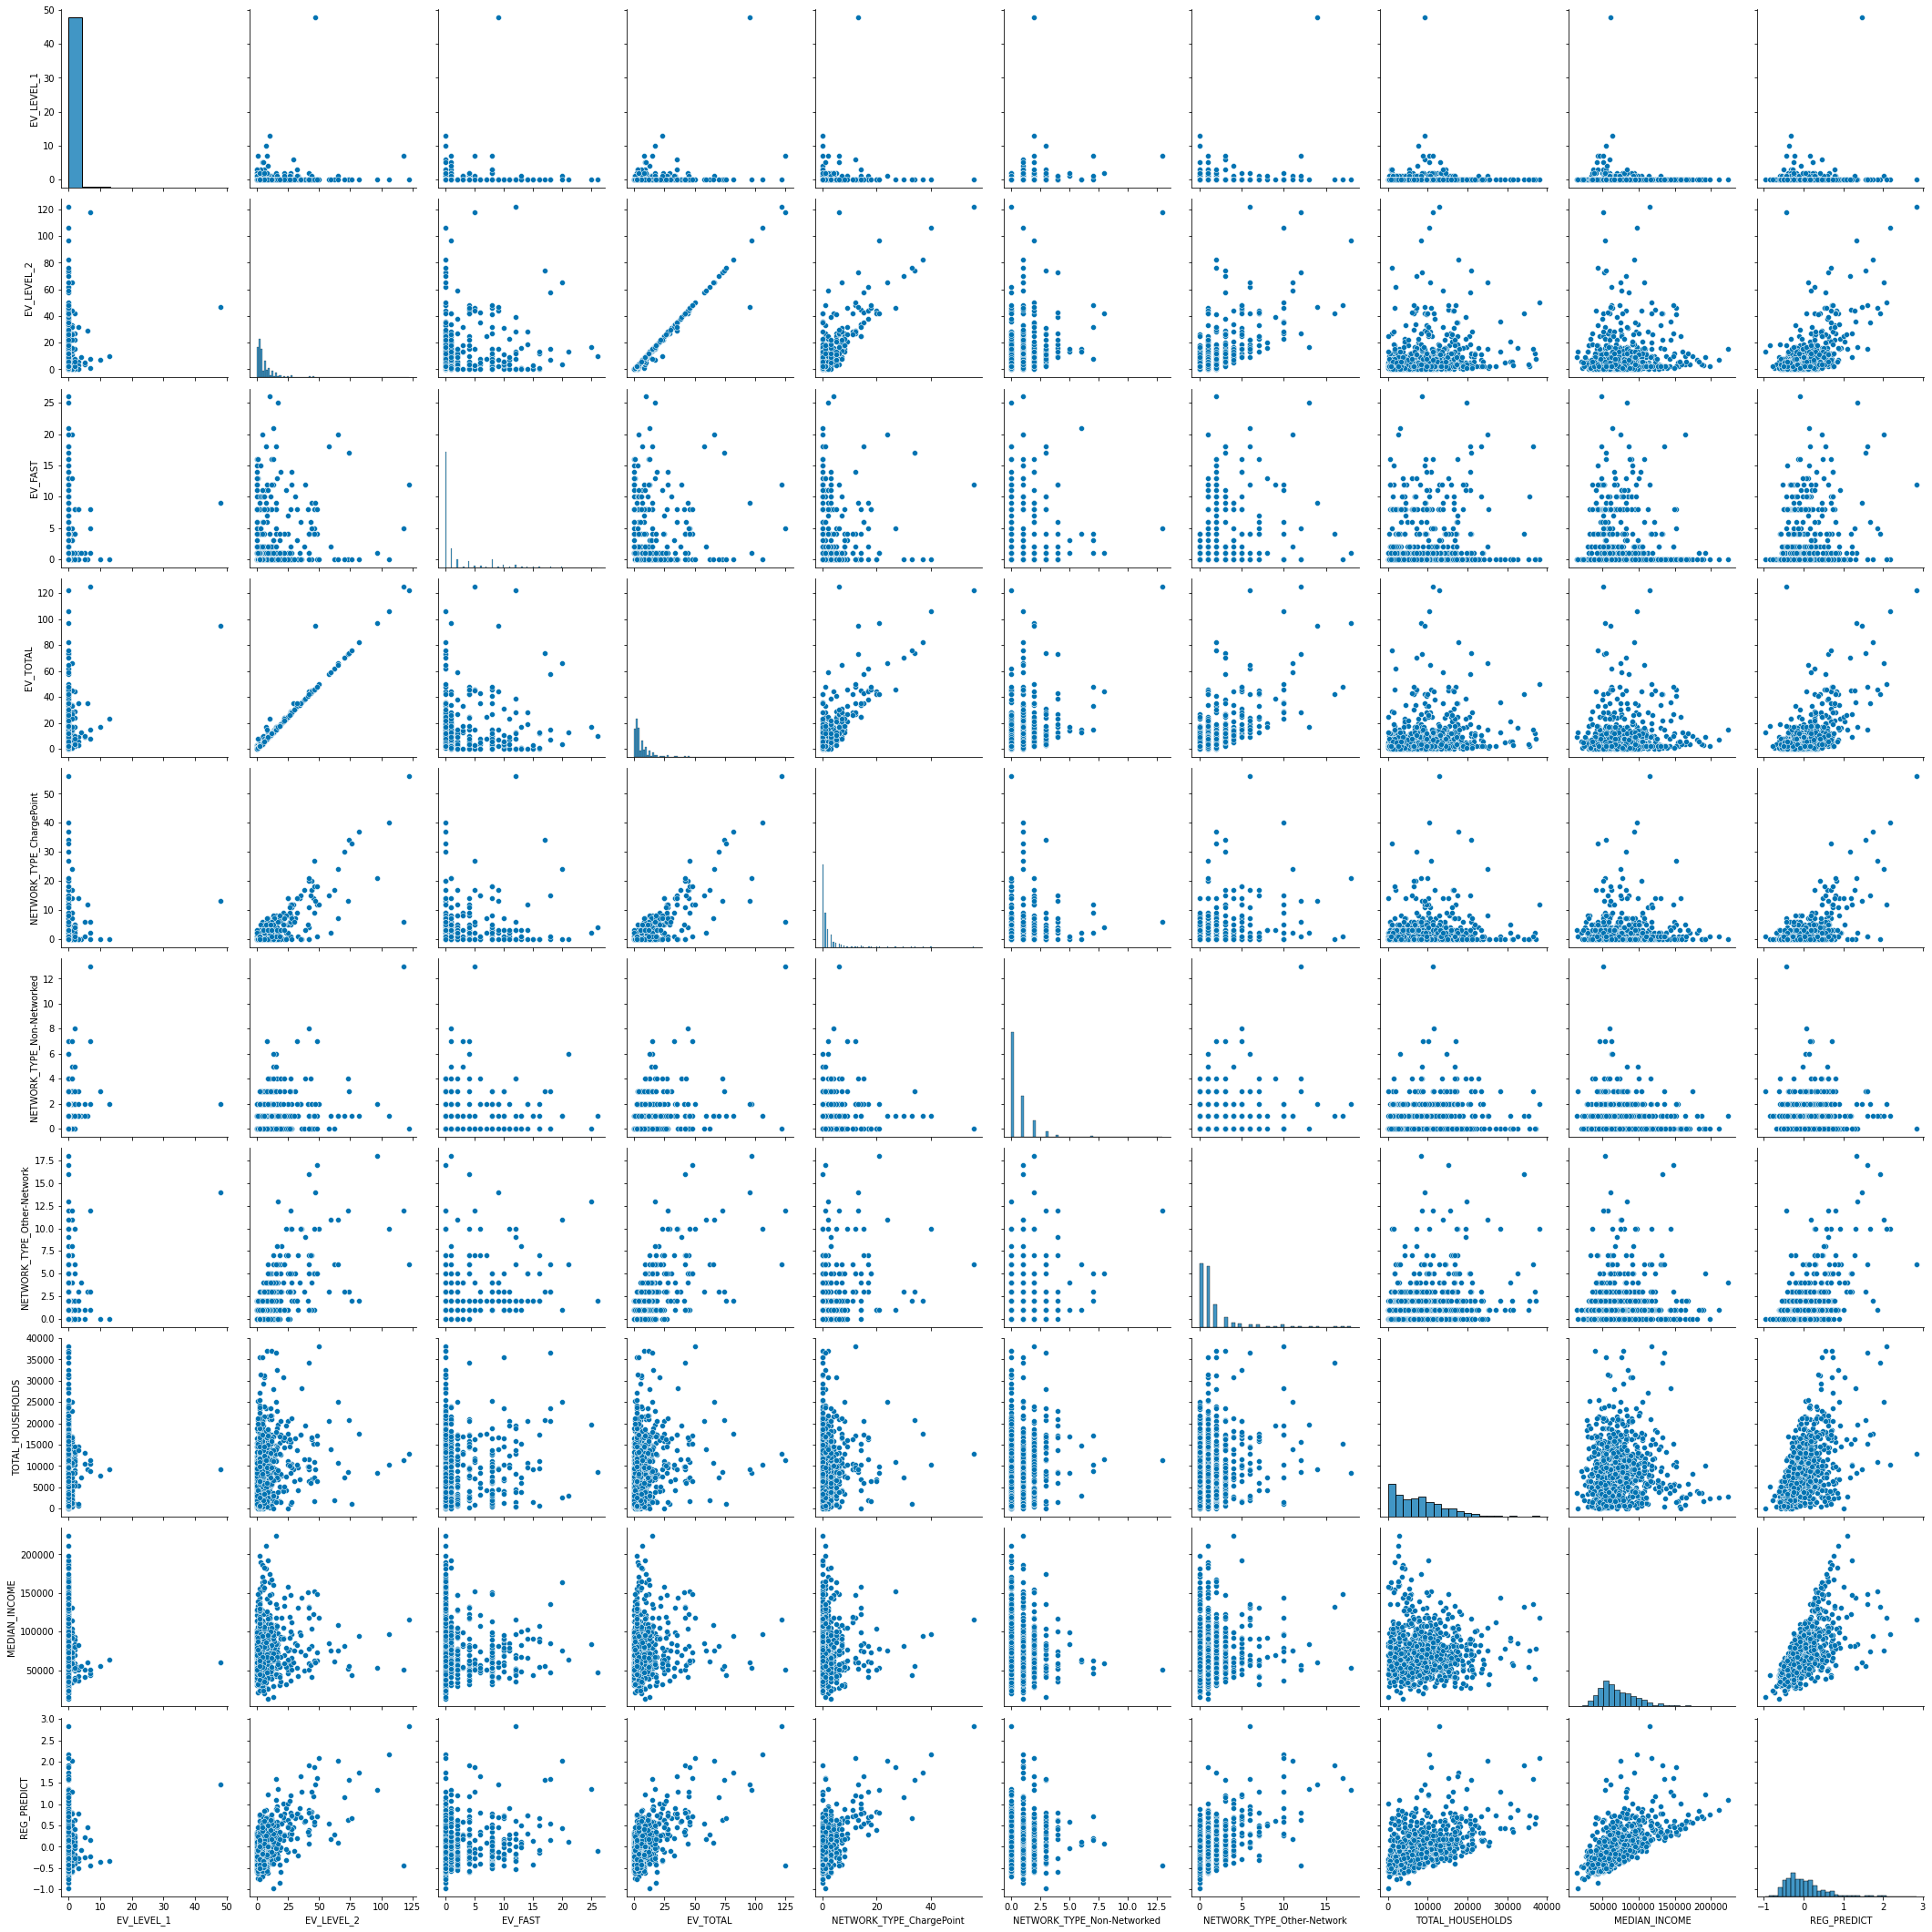

In [140]:
sns.set_palette('colorblind')
sns.pairplot(data=ml_out_df, height=3)